In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

# Limit GPU ram growth

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Dataset import

In [7]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)
# Check the image
images.as_numpy_iterator().next()

b'data\\images\\40c8ac75-dfb5-11ed-936d-d8bbc13922f7.jpg'

In [3]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [17]:
images.as_numpy_iterator().next()
#the shape of the image is (480, 640, 3)
#(# of length pixels, # of width pixels, # of color channels)

array([[[ 83,  87,  54],
        [ 99, 107,  83],
        [101, 116, 113],
        ...,
        [225, 226, 212],
        [222, 223, 205],
        [215, 217, 196]],

       [[120, 120,  94],
        [129, 132, 115],
        [ 95, 105, 104],
        ...,
        [220, 221, 205],
        [215, 217, 196],
        [212, 214, 192]],

       [[ 98,  94,  83],
        [102,  99,  94],
        [101, 100, 105],
        ...,
        [223, 226, 205],
        [214, 218, 193],
        [218, 222, 197]],

       ...,

       [[ 48,  42,  26],
        [ 41,  38,  19],
        [ 30,  34,   7],
        ...,
        [ 57,  59,  37],
        [ 70,  69,  48],
        [ 61,  61,  37]],

       [[ 42,  42,  30],
        [ 40,  41,  27],
        [ 36,  39,  22],
        ...,
        [ 77,  76,  55],
        [ 78,  76,  55],
        [ 88,  86,  65]],

       [[ 41,  43,  32],
        [ 34,  36,  25],
        [ 31,  34,  23],
        ...,
        [ 82,  80,  59],
        [ 85,  80,  61],
        [ 95,  90,  71]]

## View the raw image in matplotlib

In [24]:
image_generators  = images.batch(4).as_numpy_iterator()

In [29]:
# Loop one time
plot_images = image_generators.next()

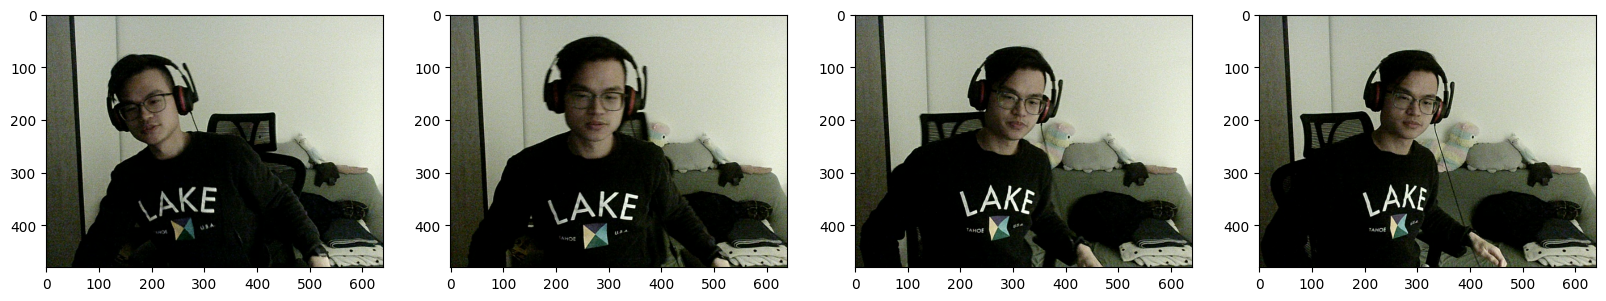

In [30]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    axs[idx].imshow(image)
plt.show()

In [36]:
os.listdir(os.path.join('data', 'train', 'images'))

['40c8ac75-dfb5-11ed-936d-d8bbc13922f7.jpg',
 '4115fa64-dfb5-11ed-b677-d8bbc13922f7.jpg',
 '41631939-dfb5-11ed-8bbf-d8bbc13922f7.jpg',
 '41b1aea9-dfb5-11ed-955f-d8bbc13922f7.jpg',
 '41fedd3f-dfb5-11ed-a73b-d8bbc13922f7.jpg',
 '424bef44-dfb5-11ed-a536-d8bbc13922f7.jpg',
 '429903c5-dfb5-11ed-8d5d-d8bbc13922f7.jpg',
 '42e74dba-dfb5-11ed-9f90-d8bbc13922f7.jpg',
 '43346d55-dfb5-11ed-9036-d8bbc13922f7.jpg',
 '438196e6-dfb5-11ed-9348-d8bbc13922f7.jpg',
 '43cebea0-dfb5-11ed-9976-d8bbc13922f7.jpg',
 '441bcef4-dfb5-11ed-88d2-d8bbc13922f7.jpg',
 '44690245-dfb5-11ed-b2ca-d8bbc13922f7.jpg',
 '44b7840f-dfb5-11ed-b453-d8bbc13922f7.jpg',
 '4504a816-dfb5-11ed-ac4c-d8bbc13922f7.jpg',
 '45533d02-dfb5-11ed-aa02-d8bbc13922f7.jpg',
 '45a06ccd-dfb5-11ed-9f4b-d8bbc13922f7.jpg',
 '45ed8190-dfb5-11ed-bc08-d8bbc13922f7.jpg',
 '463a99bb-dfb5-11ed-887d-d8bbc13922f7.jpg',
 '468926b3-dfb5-11ed-8014-d8bbc13922f7.jpg',
 '46d652a1-dfb5-11ed-b422-d8bbc13922f7.jpg',
 '47236972-dfb5-11ed-bb66-d8bbc13922f7.jpg',
 '47707e09

In [34]:
#since we have around 90 image in total, 
# train, test, val is 60, 14, 17
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

In [37]:
import albumentations as alb

In [85]:
augmentor = alb.Compose([
            alb.RandomCrop(width=450, height=450), 
            alb.HorizontalFlip(p=0.5),
            alb.RandomBrightnessContrast(p=0.2),
            alb.RandomGamma(p=0.2),
            alb.RGBShift(p=0.2),
            alb.VerticalFlip(p=0.2)], 
            bbox_params=alb.BboxParams(format='albumentations',
                                        label_fields=['class_labels']))

In [86]:
# Check for image
img = cv2.imread(os.path.join('data', 'train', 'images', '40c8ac75-dfb5-11ed-936d-d8bbc13922f7.jpg'))
img.shape

(480, 640, 3)

In [87]:
# Check for label
with open(os.path.join('data', 'train', 'labels', '40c8ac75-dfb5-11ed-936d-d8bbc13922f7.json'), 'rb') as f:
    label = json.load(f)
label

{'version': '5.2.0.post4',
 'flags': {},
 'shapes': [{'label': 'Lee',
   'points': [[293.5576923076923, 70.28846153846155],
    [455.09615384615387, 291.44230769230774]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\40c8ac75-dfb5-11ed-936d-d8bbc13922f7.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8

In [88]:
# The location of the two corners of the rectangle
label['shapes'][0]['points']

[[293.5576923076923, 70.28846153846155],
 [455.09615384615387, 291.44230769230774]]

In [89]:
# Put into the the new list
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[293.5576923076923, 70.28846153846155, 455.09615384615387, 291.44230769230774]

In [90]:
# Transformation to albumentations
coords = list(np.divide(coords, [640, 480, 640, 480]))
coords

[0.4586838942307693,
 0.14643429487179488,
 0.7110877403846154,
 0.6071714743589745]

In [91]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['Lee'])
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [92]:
augmented['image'].shape, augmented['bboxes'], augmented['class_labels']

((450, 450, 3),
 [(0.062008547008546966,
   0.12064102564102566,
   0.420982905982906,
   0.6120940170940172)],
 ['Lee'])

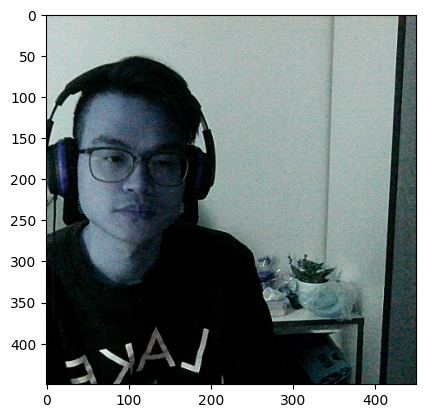

In [93]:
plt.imshow(augmented['image'])

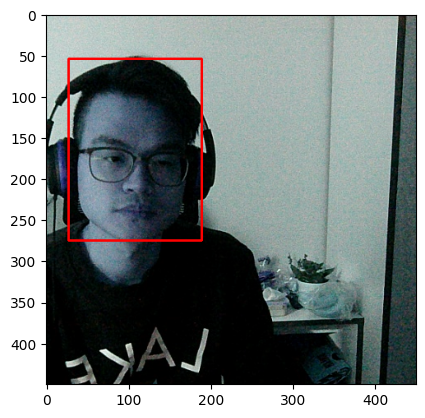

In [94]:
# Draw a rectangle into the image
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
              (255,0,0), 2)
plt.imshow(augmented['image'])


In [95]:
# The pipeline to augment the pictures
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            # Create 60 augmented images from 1 original image
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

# Load augmented image to TF dataset

In [4]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
# Resize the image base on the model you apply
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
# Normalization
train_images = train_images.map(lambda x: x/255)

test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [5]:
train_images.as_numpy_iterator().next()

array([[[6.48100495e-01, 7.30453432e-01, 6.60845578e-01],
        [6.60845578e-01, 7.34375000e-01, 6.56433821e-01],
        [6.85355365e-01, 7.44669139e-01, 6.76531851e-01],
        ...,
        [8.44240189e-01, 8.99142146e-01, 8.35049033e-01],
        [8.00551474e-01, 8.51531863e-01, 7.81127453e-01],
        [8.24571073e-01, 8.80453408e-01, 7.94669092e-01]],

       [[6.40318632e-01, 7.14460790e-01, 6.40134811e-01],
        [6.53124988e-01, 7.19791651e-01, 6.49325967e-01],
        [6.76715672e-01, 7.42892146e-01, 6.81617618e-01],
        ...,
        [8.38970602e-01, 8.93872559e-01, 8.34068656e-01],
        [8.32965672e-01, 8.87867630e-01, 8.21200967e-01],
        [8.33578408e-01, 8.92401934e-01, 8.05147052e-01]],

       [[6.29901946e-01, 6.96568608e-01, 6.25980377e-01],
        [6.53798997e-01, 7.20465660e-01, 6.50857866e-01],
        [6.76838219e-01, 7.43014693e-01, 6.81740224e-01],
        ...,
        [8.28553915e-01, 8.87377441e-01, 8.05024505e-01],
        [8.33026946e-01, 8.91

# Load label to TF dataset

In [6]:
# Create a function that extract the info from json file ['class'], and ['bbox']
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [7]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [8]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3413, 0.1073, 0.7   , 0.5986], dtype=float16))

# Combine the labels and images

In [9]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 960, 960, 900, 900)

In [10]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [11]:
# In TF dataset, [0] is image, [1] is label
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [12]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.      , 0.2437  , 0.0472  , 0.7734  ],
        [0.336   , 0.1392  , 0.5967  , 0.5454  ],
        [0.      , 0.4424  , 0.09106 , 0.8335  ],
        [0.7207  , 0.0678  , 1.      , 0.491   ],
        [0.      , 0.4807  , 0.003975, 0.857   ],
        [0.5674  , 0.      , 0.907   , 0.44    ],
        [0.664   , 0.4177  , 0.9976  , 0.828   ],
        [0.572   , 0.4338  , 0.8813  , 0.919   ]], dtype=float16))

In [13]:
data_samples = train.as_numpy_iterator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


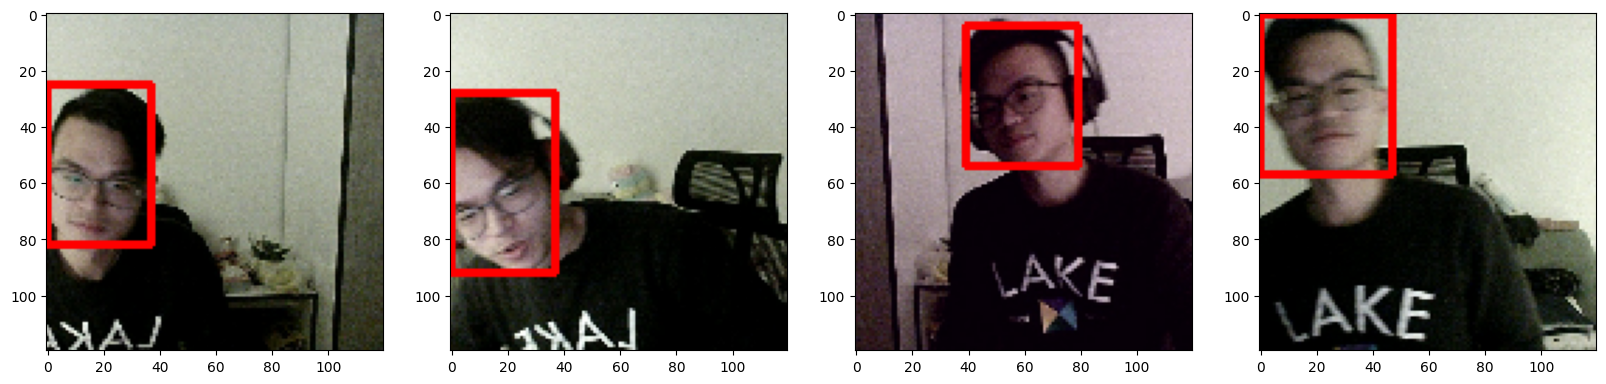

In [14]:
res = data_samples.next()
fig, axs = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):

    sample_img = res[0][idx]
    # res is TF dataset, res[1][0] is label, res[1][1] is bbox location
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_img, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)
    axs[idx].imshow(sample_img)

# Model (VGG16)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [16]:
vgg = VGG16(include_top=False)

In [17]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [18]:
def build_model():
    
    input_layer = Input(shape=(120, 120, 3))

    vgg = VGG16(include_top=False)(input_layer)
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [19]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [20]:
X, y = train.as_numpy_iterator().next()

In [21]:
X.shape

(8, 120, 120, 3)

In [22]:
len(train)

450

In [23]:
batches_per_epoch = len(train)
lr_decay = (1./.75-1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [24]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [25]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

# Train model

In [26]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [27]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [28]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
450/450 [==============================] - 24s 36ms/step - total_loss: 0.2456 - class_loss: 0.0599 - regress_loss: 0.2156 - val_total_loss: 0.0719 - val_class_loss: 1.2166e-04 - val_regress_loss: 0.0719
Epoch 2/10
450/450 [==============================] - 18s 35ms/step - total_loss: 0.0703 - class_loss: 0.0182 - regress_loss: 0.0612 - val_total_loss: 0.2073 - val_class_loss: 0.1135 - val_regress_loss: 0.1506
Epoch 3/10
450/450 [==============================] - 18s 35ms/step - total_loss: 0.0480 - class_loss: 0.0107 - regress_loss: 0.0427 - val_total_loss: 0.9205 - val_class_loss: 0.5356 - val_regress_loss: 0.6527
Epoch 4/10
450/450 [==============================] - 19s 35ms/step - total_loss: 0.0294 - class_loss: 0.0075 - regress_loss: 0.0257 - val_total_loss: 0.0210 - val_class_loss: 1.4845e-04 - val_regress_loss: 0.0209
Epoch 5/10
450/450 [==============================] - 19s 35ms/step - total_loss: 0.0126 - class_loss: 0.0019 - regress_loss: 0.0117 - val_total_loss: 0

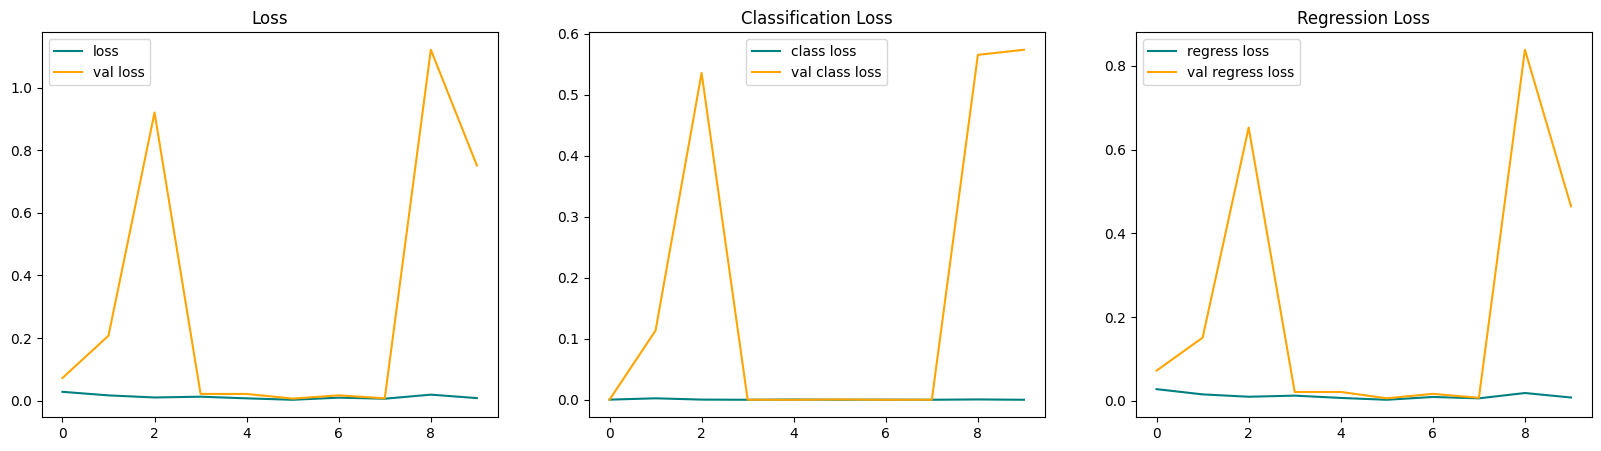

In [30]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [32]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


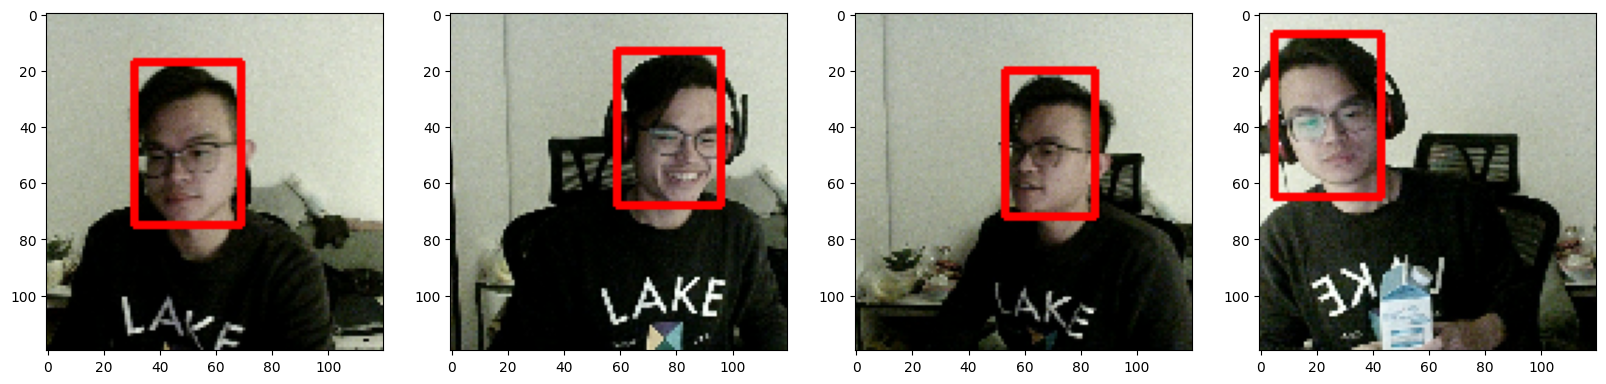

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0), verbose=0)
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'Lee', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    
    cv2.imshow('EyeTrack', frame)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
#cv2.destroyAllWindows()